# Results on ENCODE TF ChIP-seq (recurring peaks) using JASPAR2014 binding profiles for ChIP'ed TFs

## Data sets

In [1]:
%config InlineBackend.figure_formats=['svg']
%matplotlib inline
from matplotlib.pyplot import savefig
import pandas as pd
import numpy as np
import os
from scipy.stats import wilcoxon
data = pd.read_csv("JASPAR_matrices.txt", names=["JASPAR_id"])
data.index = data.JASPAR_id
print "{0:d} TFs considered here (i.e. associated to a JASPAR profile).".format(len(data))

61 TFs considered here (i.e. associated to a JASPAR profile).


In [2]:
def auc_val(inline):
    return eval(inline.split(' ')[-1])

In [3]:
rep = '20160125_JasparMatchedMergedChipseqScaledDnashape2ndOrderDimo'
for repo in os.listdir(rep):
    if repo.startswith('MA0'):
        res_file = '{0}/{1}/predictions_results.txt'.format(rep, repo)
        if os.path.isfile(res_file):
            with open(res_file) as stream:
                first_line = stream.readline()
                assert first_line.startswith('ROC AUC TFFM+DNAshape')
                data.loc[repo, 'TFFM_dnashape_AUROC'] = auc_val(first_line)
                second_line = stream.readline()
                assert second_line.startswith('PR AUC TFFM+DNAshape')
                data.loc[repo, 'TFFM_dnashape_AUPRC'] = auc_val(second_line)
                third_line = stream.readline()
                assert third_line.startswith('ROC AUC TFFM')
                data.loc[repo, 'TFFM_AUROC'] = auc_val(third_line)
                fourth_line = stream.readline()
                assert fourth_line.startswith('PR AUC TFFM')
                data.loc[repo, 'TFFM_AUPRC'] = auc_val(fourth_line)
                fifth_line = stream.readline()
                assert fifth_line.startswith('ROC AUC PWM+DNAshape')
                data.loc[repo, 'PSSM_dnashape_AUROC'] = auc_val(fifth_line)
                sixth_line = stream.readline()
                assert sixth_line.startswith('PR AUC PWM+DNAshape')
                data.loc[repo, 'PSSM_dnashape_AUPRC'] = auc_val(sixth_line)
                seventh_line = stream.readline()
                assert seventh_line.startswith('ROC AUC PWM')
                data.loc[repo, 'PSSM_AUROC'] = auc_val(seventh_line)
                eighth_line = stream.readline()
                assert eighth_line.startswith('PR AUC PWM')
                data.loc[repo, 'PSSM_AUPRC'] = auc_val(eighth_line)
                data.loc[repo, 'TFFM_AUROC_improvement'] = (
                    data.loc[repo, 'TFFM_dnashape_AUROC'] - data.loc[repo, 'TFFM_AUROC'])
                data.loc[repo, 'TFFM_AUPRC_improvement'] = (
                    data.loc[repo, 'TFFM_dnashape_AUPRC'] - data.loc[repo, 'TFFM_AUPRC'])
                data.loc[repo, 'PSSM_AUROC_improvement'] = (
                        data.loc[repo, 'PSSM_dnashape_AUROC'] - data.loc[repo, 'PSSM_AUROC'])
                data.loc[repo, 'PSSM_AUPRC_improvement'] = (
                            data.loc[repo, 'PSSM_dnashape_AUPRC'] - data.loc[repo, 'PSSM_AUPRC'])

In [4]:
rep = '20160502_JasparMatchedMergedChipseq1merScaledDnashape2ndOrderDimoGradboost'
for repo in os.listdir(rep):
    if repo.startswith('MA0'):
        res_file = '{0}/{1}/predictions_results.txt'.format(rep, repo)
        if os.path.isfile(res_file):
            with open(res_file) as stream:
                first_line = stream.readline()
                assert first_line.startswith('ROC AUC 1mer+DNAshape')
                data.loc[repo, '4bits_dnashape_AUROC'] = auc_val(first_line)
                second_line = stream.readline()
                assert second_line.startswith('PR AUC 1mer+DNAshape')
                data.loc[repo, '4bits_dnashape_AUPRC'] = auc_val(second_line)
                third_line = stream.readline()
                assert third_line.startswith('ROC AUC 1mer')
                data.loc[repo, '4bits_AUROC'] = auc_val(third_line)
                fourth_line = stream.readline()
                assert fourth_line.startswith('PR AUC 1mer')
                data.loc[repo, '4bits_AUPRC'] = auc_val(fourth_line)
                data.loc[repo, '4bits_AUROC_improvement'] = (
                    data.loc[repo, '4bits_dnashape_AUROC'] - data.loc[repo, '4bits_AUROC'])
                data.loc[repo, '4bits_AUPRC_improvement'] = (
                    data.loc[repo, '4bits_dnashape_AUPRC'] - data.loc[repo, '4bits_AUPRC'])

## TFFM analyses

In [5]:
print "TFFM-based classifiers have higher AUROC in {0:d} over {1:d} cases".format(
    len(data[data["TFFM_dnashape_AUROC"] > data["TFFM_AUROC"]]), len(data.dropna()))
print "TFFM-based classifiers have higher AUPRC in {0:d} over {1:d} cases".format(
    len(data[data["TFFM_dnashape_AUPRC"] > data["TFFM_AUPRC"]]), len(data.dropna()))

TFFM-based classifiers have higher AUROC in 60 over 61 cases
TFFM-based classifiers have higher AUPRC in 58 over 61 cases


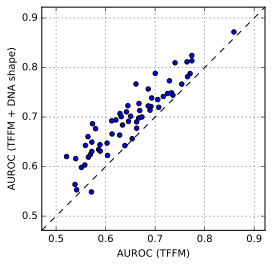

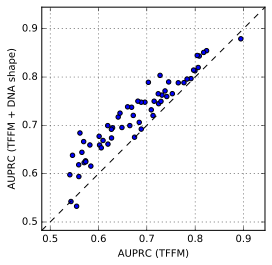

In [6]:
mini = min(min(data.dropna()["TFFM_AUROC"]), min(data.dropna()["TFFM_dnashape_AUROC"])) - 0.05
maxi = max(max(data.dropna()["TFFM_AUROC"]), max(data.dropna()["TFFM_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(x="TFFM_AUROC", y="TFFM_dnashape_AUROC", kind="scatter")
axes.set_xlabel("AUROC (TFFM)")
axes.set_ylabel("AUROC (TFFM + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig("AUROC_combinedPeaks_TFFM_TFFM+DNAshape.svg")

mini = min(min(data.dropna()["TFFM_AUPRC"]), min(data.dropna()["TFFM_dnashape_AUPRC"])) - 0.05
maxi = max(max(data.dropna()["TFFM_AUPRC"]), max(data.dropna()["TFFM_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(x="TFFM_AUPRC", y="TFFM_dnashape_AUPRC", kind="scatter")
axes.set_xlabel("AUPRC (TFFM)")
axes.set_ylabel("AUPRC (TFFM + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig("AUPRC_combinedPeaks_TFFM_TFFM+DNAshape.svg")

In [7]:
print wilcoxon(data.TFFM_dnashape_AUROC, data.TFFM_AUROC)
print wilcoxon(data.TFFM_dnashape_AUPRC, data.TFFM_AUPRC)

WilcoxonResult(statistic=14.0, pvalue=2.2202129399099449e-11)
WilcoxonResult(statistic=29.0, pvalue=4.6100602144690691e-11)


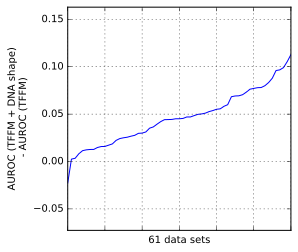

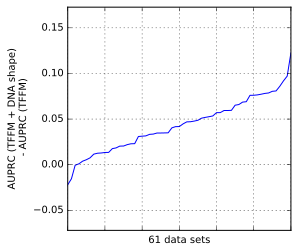

In [8]:
data = data.sort_values("TFFM_AUROC_improvement")
axes = data.dropna().plot(y="TFFM_AUROC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("AUROC (TFFM + DNA shape)\n - AUROC (TFFM)")
axes.set_ylim(min(data.TFFM_AUROC_improvement) - 0.05,
              max(data.TFFM_AUROC_improvement) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
axes.grid()
#savefig("AUROC_combinedPeaks_improvement_TFFM_TFFM+DNAshape.svg")

data = data.sort_values("TFFM_AUPRC_improvement")
axes = data.dropna().plot(y="TFFM_AUPRC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("AUPRC (TFFM + DNA shape)\n - AUPRC (TFFM)")
axes.set_ylim(min(data.TFFM_AUPRC_improvement) - 0.05,
              max(data.TFFM_AUPRC_improvement) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
axes.grid()
#savefig("AUPRC_combinedPeaks_improvement_TFFM_TFFM+DNAshape.svg")

## PSSM analyses

In [9]:
print "PSSM-based classifiers have higher AUROC in {0:d} over {1:d} cases".format(
    len(data[data["PSSM_dnashape_AUROC"] > data["PSSM_AUROC"]]), len(data.dropna()))
print "PSSM-based classifiers have higher AUPRC in {0:d} over {1:d} cases".format(
    len(data[data["PSSM_dnashape_AUPRC"] > data["PSSM_AUPRC"]]), len(data.dropna()))

PSSM-based classifiers have higher AUROC in 60 over 61 cases
PSSM-based classifiers have higher AUPRC in 59 over 61 cases


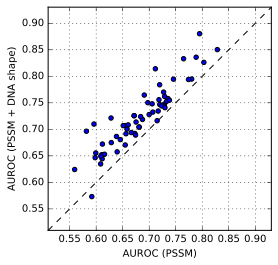

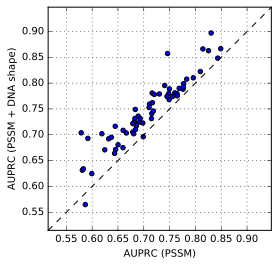

In [10]:
mini = min(min(data.dropna()["PSSM_AUROC"]), min(data.dropna()["PSSM_dnashape_AUROC"])) - 0.05
maxi = max(max(data["PSSM_AUROC"]), max(data["PSSM_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(x="PSSM_AUROC", y="PSSM_dnashape_AUROC", kind="scatter")
axes.set_xlabel("AUROC (PSSM)")
axes.set_ylabel("AUROC (PSSM + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig("AUROC_PSSM_PSSM+DNAshape.svg")

mini = min(min(data["PSSM_AUPRC"]), min(data["PSSM_dnashape_AUPRC"])) - 0.05
maxi = max(max(data["PSSM_AUPRC"]), max(data["PSSM_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(x="PSSM_AUPRC", y="PSSM_dnashape_AUPRC", kind="scatter")
axes.set_xlabel("AUPRC (PSSM)")
axes.set_ylabel("AUPRC (PSSM + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig("AUPRC_combinedPeaks_PSSM_PSSM+DNAshape.svg")

In [11]:
print wilcoxon(data.PSSM_dnashape_AUROC, data.PSSM_AUROC)
print wilcoxon(data.PSSM_dnashape_AUPRC, data.PSSM_AUPRC)

WilcoxonResult(statistic=10.0, pvalue=1.8236590464231979e-11)
WilcoxonResult(statistic=20.0, pvalue=2.9779146402296801e-11)


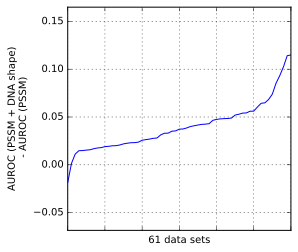

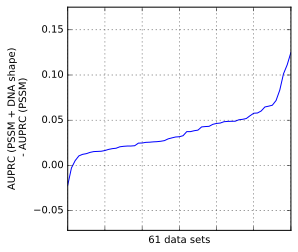

In [12]:
data = data.sort_values("PSSM_AUROC_improvement")
axes = data.dropna().plot(y="PSSM_AUROC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("AUROC (PSSM + DNA shape)\n - AUROC (PSSM)")
axes.set_ylim(min(data.PSSM_AUROC_improvement) - 0.05,
              max(data.PSSM_AUROC_improvement) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
axes.grid()
#savefig("AUROC_combinedPeaks_improvement_PSSM_PSSM+DNAshape.svg")

data = data.sort_values("PSSM_AUPRC_improvement")
axes = data.dropna().plot(y="PSSM_AUPRC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("AUPRC (PSSM + DNA shape)\n - AUPRC (PSSM)")
axes.set_ylim(min(data.PSSM_AUPRC_improvement) - 0.05,
              max(data.PSSM_AUPRC_improvement) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
axes.grid()
#savefig("AUPRC_combinedPeaks_improvement_PSSM_PSSM+DNAshape.svg")

## 4-bits analyses

In [13]:
print "4bits-based classifiers have higher AUROC in {0:d} over {1:d} cases".format(
    len(data[data["4bits_dnashape_AUROC"] > data["4bits_AUROC"]]), len(data.dropna()))
print "4bits-based classifiers have higher AUPRC in {0:d} over {1:d} cases".format(
    len(data[data["4bits_dnashape_AUPRC"] > data["4bits_AUPRC"]]), len(data.dropna()))

4bits-based classifiers have higher AUROC in 45 over 61 cases
4bits-based classifiers have higher AUPRC in 45 over 61 cases


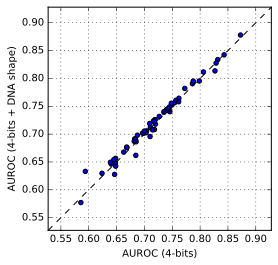

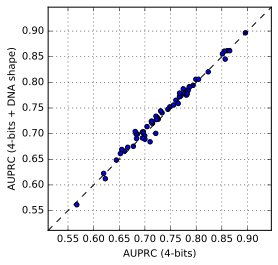

In [14]:
mini = min(min(data.dropna()["4bits_AUROC"]), 
           min(data.dropna()["4bits_dnashape_AUROC"])) - 0.05
maxi = max(max(data.dropna()["4bits_AUROC"]), 
           max(data.dropna()["4bits_dnashape_AUROC"])) + 0.05
axes = data.dropna().plot(x="4bits_AUROC", y="4bits_dnashape_AUROC", kind="scatter")
axes.set_xlabel("AUROC (4-bits)")
axes.set_ylabel("AUROC (4-bits + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig("AUROC_4bits_4bits+DNAshape.svg")

mini = min(min(data.dropna()["4bits_AUPRC"]), 
           min(data.dropna()["4bits_dnashape_AUPRC"])) - 0.05
maxi = max(max(data.dropna()["4bits_AUPRC"]), 
           max(data.dropna()["4bits_dnashape_AUPRC"])) + 0.05
axes = data.dropna().plot(x="4bits_AUPRC", y="4bits_dnashape_AUPRC", kind="scatter")
axes.set_xlabel("AUPRC (4-bits)")
axes.set_ylabel("AUPRC (4-bits + DNA shape)")
axes.plot((mini, maxi), (mini, maxi), 'k--')
axes.set_xlim(mini, maxi)
axes.set_ylim(mini, maxi)
axes.set_aspect('equal')
axes.grid()
#savefig("AUPRC_4bits_4bits+DNAshape.svg")

In [15]:
print wilcoxon(data['4bits_dnashape_AUROC'], data['4bits_AUROC'])
print wilcoxon(data['4bits_dnashape_AUPRC'], data['4bits_AUPRC'])

WilcoxonResult(statistic=501.5, pvalue=0.0014268555520432077)
WilcoxonResult(statistic=483.0, pvalue=0.00089363884882705572)


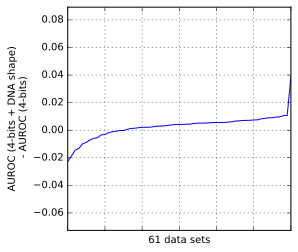

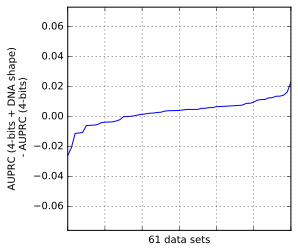

In [16]:
data = data.sort_values("4bits_AUROC_improvement")
axes = data.dropna().plot(y="4bits_AUROC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("AUROC (4-bits + DNA shape)\n - AUROC (4-bits)")
axes.set_ylim(min(data['4bits_AUROC_improvement']) - 0.05,
              max(data['4bits_AUROC_improvement']) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
axes.grid()
#savefig("AUROC_improvement_4bits_4bits+DNAshape.svg")

data = data.sort_values("4bits_AUPRC_improvement")
axes = data.dropna().plot(y="4bits_AUPRC_improvement", use_index=False, legend=False)
axes.tick_params(axis="x", labelbottom='off')
axes.set_xlabel("{0:d} data sets".format(len(data.dropna())))
axes.set_ylabel("AUPRC (4-bits + DNA shape)\n - AUPRC (4-bits)")
axes.set_ylim(min(data['4bits_AUPRC_improvement']) - 0.05,
              max(data['4bits_AUPRC_improvement']) + 0.05)
axes.set_aspect(1./axes.get_data_ratio())
axes.grid()
#savefig("AUPRC_improvement_4bits_4bits+DNAshape.svg")